In [11]:
import os
import pickle
import pandas as pd
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from tqdm.notebook import tqdm
from functions import dirs, regression, readSet, corrMatrix
tqdm.pandas()

In [12]:
datasets = dirs('./data')
#datasets = ['AirlineTweets']
#datasets = ['Sentiment140']
#datasets = ['IMDB']

In [13]:
picked = list(readSet('./data/Dimensions-Picked-Final.txt'))

Datasets:   0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/11541 [00:00<?, ?it/s]

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                11541
Model:                          Logit   Df Residuals:                    11523
Method:                           MLE   Df Model:                           17
Date:                Mon, 03 May 2021   Pseudo R-squ.:                  0.1061
Time:                        18:06:03   Log-Likelihood:                -5039.8
converged:                       True   LL-Null:                       -5637.8
Covariance Type:                  HC3   LLR p-value:                8.989e-244
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                 2.4097      0.307      7.845      0.000       1.808       3.012
nrPossesives/nrWords                 -2.8177      0.436     -6

  0%|          | 0/50000 [00:00<?, ?it/s]

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                50000
Model:                          Logit   Df Residuals:                    49982
Method:                           MLE   Df Model:                           17
Date:                Mon, 03 May 2021   Pseudo R-squ.:                 0.04741
Time:                        18:06:05   Log-Likelihood:                -32469.
converged:                       True   LL-Null:                       -34085.
Covariance Type:                  HC3   LLR p-value:                     0.000
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                 0.3803      0.283      1.342      0.180      -0.175       0.936
nrPossesives/nrWords                -10.9456      0.537    -20

  0%|          | 0/1600000 [00:00<?, ?it/s]

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:              1600000
Model:                          Logit   Df Residuals:                  1599982
Method:                           MLE   Df Model:                           17
Date:                Mon, 03 May 2021   Pseudo R-squ.:                 0.01291
Time:                        18:06:58   Log-Likelihood:            -9.8643e+05
converged:                       True   LL-Null:                   -9.9933e+05
Covariance Type:                  HC3   LLR p-value:                     0.000
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                 0.3975      0.018     22.440      0.000       0.363       0.432
nrPossesives/nrWords                  0.2002      0.026      7

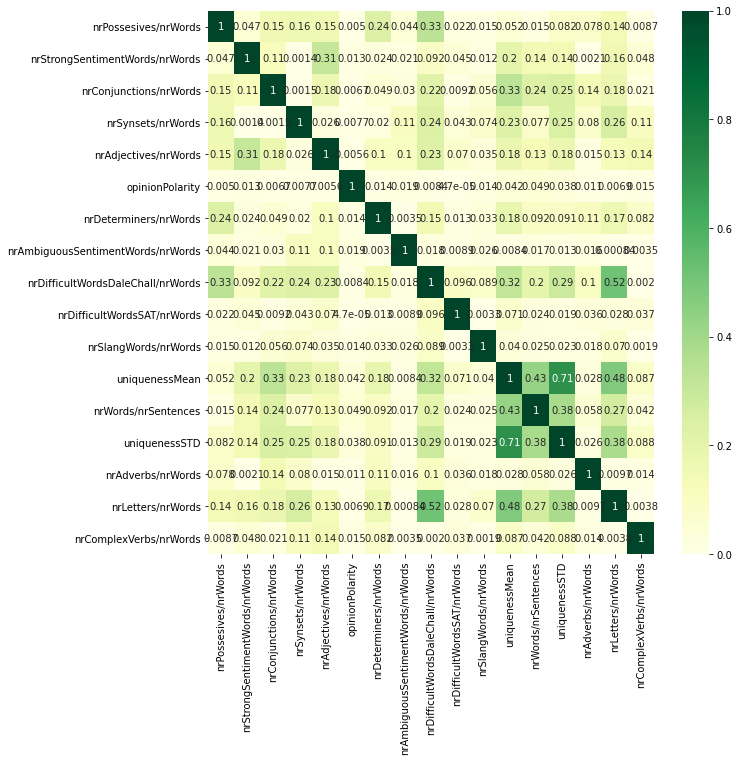

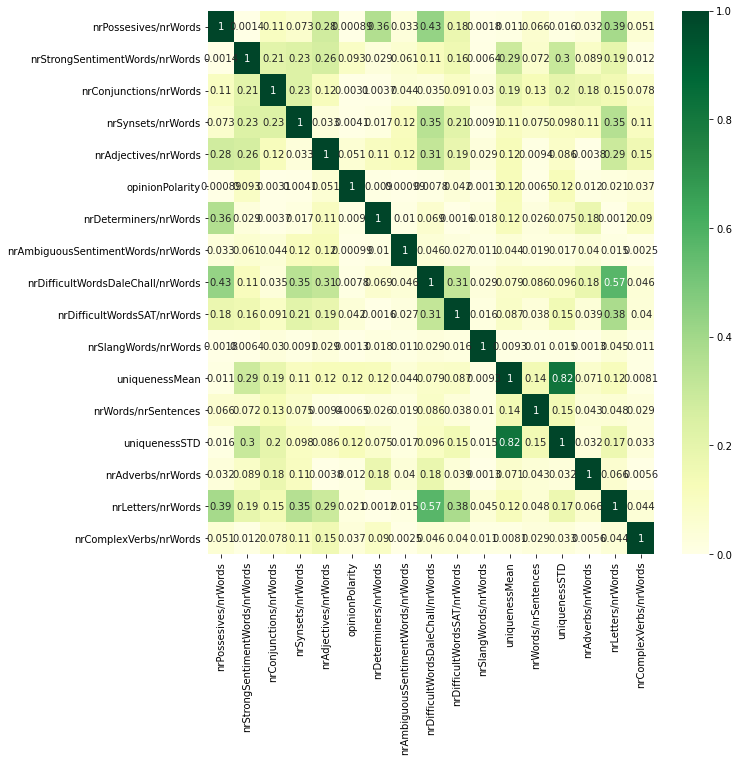

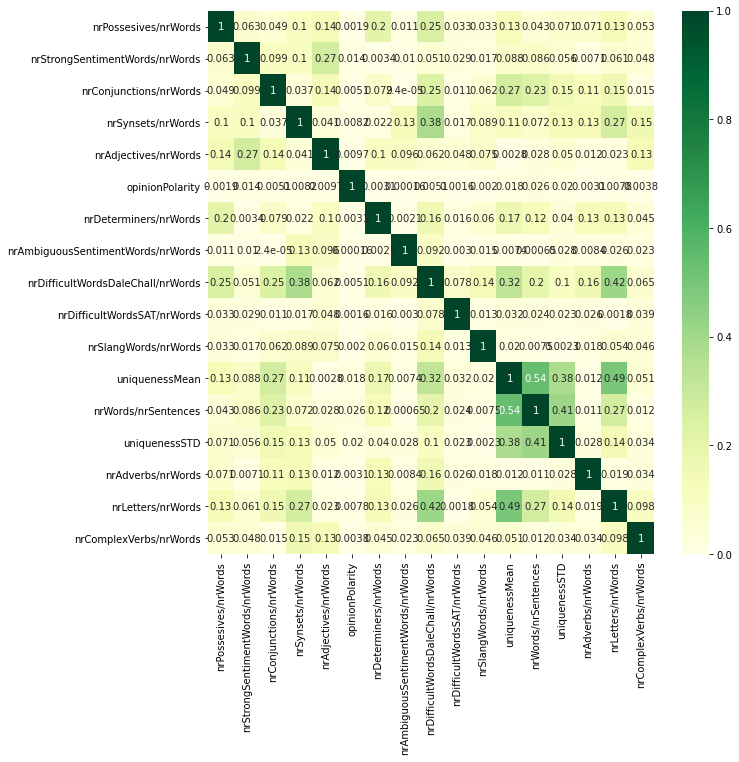

In [14]:
for dataset in tqdm(datasets, desc="Datasets"):
    outputFile = f'./data/{dataset}/Regression.pickle'
    corrMatrixFile = f'./data/{dataset}/Corrmatrix.png'

    dims = pd.read_csv(f'./data/{dataset}/Dimensions.csv')
    prediction = pd.read_csv(f'./data/{dataset}/Word2Vec-Prediction.csv')

    fig = corrMatrix(dims[picked]).get_figure()
    fig.patch.set_alpha(1)
    fig.savefig(corrMatrixFile)

    y = prediction.progress_apply(lambda row: 1 if row['truth'] == row['predicted'] else 0, axis=1)
    X = dims[picked]
    
    result = regression(y, X)
    print(result.summary())
    pickle.dump(result, open(outputFile, mode='wb'))